<a href="https://colab.research.google.com/github/saigirishgilly98/Mining-weighted-sequential-patterns/blob/main/Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="purple">**Mining weighted sequential patterns in a sequence database with a time-interval weight**</font>


In [1]:
import numpy as np

In [2]:
# fetching the dataset and pre processing it

import random

# Function to create uniformly distributed random numbers 
def rand_list(start, end, num):
	res = []

	for _ in range(num):
		val = random.uniform(start, end)
		res.append(val)

	res.sort()
	return res

# Read the data from hundred.data file
text_file = open("hundred.data","r")
lines = text_file.readlines()

original_lines = lines

print("\nInput :\n")
print(lines[3])

x = dict()

for i in range(len(lines)):
	line1 = list(lines[i].split())
	length = int(line1[0])
	line1.pop(0)
 
	lst = []

	for j in range(length):
		size_of_list_of_time = int(line1[0])
		line1.pop(0)
		
		list_of_time = rand_list(0,1000,1)
		for k in range(size_of_list_of_time):
			line1.pop(0)

		lst.append(list_of_time[0])

	lst.sort()
	x[i] = lst[:]

x2= dict()

for i in range(len(original_lines)):
	line1 = list(original_lines[i].split())
	length = int(line1[0])
	line1.pop(0)
 
	list_of_time = []
	
	for j in range(length):
		size_of_list_of_time = int(line1[0])
		line1.pop(0)
		temp = ''
		for k in range(size_of_list_of_time):
			temp = temp + line1[0].zfill(4)
			line1.pop(0)

		list_of_time.append(temp)
  
	x2[i] = list_of_time

print("\n\nTime stamp\n")
print(x[2])
print("\n\nSequence\n")
print(x2[2])

database = dict()
for i in x.keys():
    if len(x[i]) > 1:
        database[str(i)] = []
        for j in range(len(x[i])):
            database[str(i)].append([x2[i][j],x[i][j]])
        
print(database.keys())



Input :

1 2 269 4701 



Time stamp

[5.015462477937382, 315.9697656281727, 689.2317084318416, 758.2150525651792, 772.3653297300446, 781.5015201846692]


Sequence

['9033', '184577138778', '128517057890', '404969087443', '07651739', '36279693']
dict_keys(['0', '1', '2', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96'])


In [3]:
print(database)

{'0': [['2479', 188.79205447760484], ['21545477', 415.82753604457025], ['0440227660369838', 449.23520093488924], ['6639792690549748', 484.6315924950768], ['1247', 542.1225608098102], ['1992', 553.5520127062316], ['2535', 619.076226815768], ['509577449337', 747.3401330457339], ['234347377188851892419486', 877.1373169080919]], '1': [['076515427203', 9.770488221553574], ['585473098827', 130.76968376411347], ['5993', 265.39543051651015], ['0991495663767993', 361.6147852372592], ['060617988964', 417.01044501308957], ['060610912787', 438.3908830385946], ['40235242', 729.1814971141047], ['245163928259', 830.6879409011782], ['07033355589271699239', 992.0062711669998]], '2': [['9033', 5.015462477937382], ['184577138778', 315.9697656281727], ['128517057890', 689.2317084318416], ['404969087443', 758.2150525651792], ['07651739', 772.3653297300446], ['36279693', 781.5015201846692]], '4': [['62737655', 60.44366009580027], ['2654', 260.907964555126]], '5': [['0149', 27.57137330688675], ['35339471', 4

In [4]:
# function to return time-intervals
def time_interval_itemsets(i,j):
    time_i = i[1]
    time_j = j[1]
    return abs(time_i - time_j)

In [5]:
# itemset pair generation
def itemset_pair_generator(seq):
    itemset_pairs = []
    n = len(seq)
    for i in range(n):
        for j in range(i+1,n):
            itemset_pairs.append([seq[i],seq[j]])
    return itemset_pairs

In [6]:
# function to generate the time intervals for a sequence
def time_interval_sequence(itemset_pairs):
    itemset_pairs_time = []
    for i in itemset_pairs:
        time_interval = time_interval_itemsets(i[0],i[1])
        itemset_pairs_time.append(i+[time_interval])
    return itemset_pairs_time

In [7]:
# function to obtain the strength of a pair of itemsets
def strength_pair(itemset_pairs_time):
    itemset_pairs_time_strength = []
    for i in itemset_pairs_time:
        itemset1 = i[0][0]
        itemset2 = i[1][0]
        # strength= len(itemset1)*len(itemset2)
        strength = len(itemset1)*len(itemset2)/16    # because each item has 4 characters
        itemset_pairs_time_strength.append(i + [strength])
    return itemset_pairs_time_strength

In [61]:
# function to calculate the weighting function of the time interval
import math

def weighting_function_1(time_interval, delta=0.9, u=1):
    w_TI = delta**(time_interval/u)
    return(w_TI)

def weighting_function_2(time_interval, delta=0.9, u=1):
    w_TI = delta**math.log((1 + (time_interval/u)), 2)
    return(w_TI)

def weighting_function_3(time_interval, delta=0.9, u=1):
    w_TI = delta**math.ceil(time_interval/u)
    return(w_TI)

def weighting_function_4(time_interval, delta=0.9, u=1):
    w_TI = 0.05 * weighting_function_2(time_interval, delta, u) + 0.95 * weighting_function_3(time_interval, delta, u) 
    return(w_TI)

In [9]:
# function to calculate the time interval weight of the sequence
def TiW_sequence(itemset_pairs_time_strength, delta=0.9, u=1, wf = 1):
    if wf == 1:
        weighting_function = weighting_function_1
    elif wf == 2:
        weighting_function = weighting_function_2
    elif wf == 3:
        weighting_function = weighting_function_3
    else:
        weighting_function = weighting_function_4
    total_strength = 0
    weighted_strength = 0
    for i in itemset_pairs_time_strength:
        w_TI = weighting_function(i[2], delta, u)
        # print(weighting_function_1(i[2], delta, u) < weighting_function_2(i[2], delta, u))
        weighted_strength += w_TI*i[3]
        total_strength += i[3]
    TiW = weighted_strength / total_strength
    return(TiW)

In [10]:
def normalize(time_interval_sequence_):
    # min_ = min(time_interval_sequence_)
    # max_ = max(time_interval_sequence_)

    # normalized_time_interval_sequence_ = []
    # for i in time_interval_sequence_:
    #   normalized_time_interval_sequence_.append((((i - min_) / (max_ - min_)) * (1 - 0.1)) + 0.1)
    
    mean_ = np.mean(time_interval_sequence_)
    std_ = np.std(time_interval_sequence_)
    
    normalized_time_interval_sequence_ = []
    for i in time_interval_sequence_:
        normalized_time_interval_sequence_.append((i - mean_) / std_)

    return normalized_time_interval_sequence_ 

def TiW_sequence_modified(itemset_pairs_time_strength, delta=0.9, u=1, wf = 1):
    time_interval_sequence_ = []
    for i in itemset_pairs_time_strength:
        time_interval_sequence_.append(i[2])
    w_TI = normalize(time_interval_sequence_)

    index_w_TI = 0
    total_strength = 0
    weighted_strength = 0
    for i in itemset_pairs_time_strength:
        weighted_strength += w_TI[index_w_TI] * i[3]
        index_w_TI += 1
        total_strength += i[3]
    TiW = weighted_strength / total_strength
    return(TiW)

In [11]:
# function to check if a given sequence is a super sequence of the other 
# checks if seq1 is a super sequence of seq2
def is_super_seq_test(seq1,seq2):
    i = 0
    j = 0
    while i < len(seq1) and j < len(seq2):
        if seq2[j][0] in seq1[i][0]:
            i += 1
            j += 1
        else:
            i += 1
    if j == len(seq2):
        return 1
    else:
        return 0
    
# testing function
def TiW_support_test():
    count = 0
    for i in database.keys():
        seq1 = database[i]
        seq2 = [['ad'],['bc'],[]]
        count += is_super_seq_test(seq1,seq2)
    
# print(count/len(database.keys()))

In [12]:
def chunkstring(string, length=4):
    return list(string[0 + i:length + i] for i in range(0, len(string), length))

def key(el):
    return len(el)    
    
def is_super_seq(s1, s2):
    seq_s1 = [chunkstring(s1[i][0]) for i in range(len(s1))]
    seq_s1.sort(key=key, reverse=True)
    seq_s2 = [chunkstring(s2[i][0]) for i in range(len(s2))]
    seq_s2.sort(key=key)
    super_seq_matrix = [0 for j in range(len(s2))]
    for ii in range(len(seq_s1)):
        for jj in range(len(seq_s2)):
            if not super_seq_matrix[jj]:
                count = 0
                for i in seq_s1[ii]:
                    if i in seq_s2[jj]:
                        count += 1
                if count == len(seq_s1[ii]):
                    super_seq_matrix[jj] = 1
    
    if sum(super_seq_matrix) == len(seq_s1):
        return True
    
    return False

In [13]:
def TiW_support(TiWs, db):
    TiW_supports = dict()
    TiW_normalise = 0
    for x in db.keys():
        selected_sum = 0
        TiW_normalise += TiWs[x]
        for s in db.keys():
            if is_super_seq(db[x], db[s]):
                selected_sum += TiWs[s]
        TiW_supports[x] = (selected_sum)

    for x in db.keys():
        TiW_supports[x] /= TiW_normalise
    return TiW_supports

In [14]:
def nominal(TiWs, db):
    n_supports = dict()
    n_normalise = 0
    for x in db.keys():
        selected_sum = 0
        n_normalise += 1
        for s in db.keys():
            if is_super_seq(db[x], db[s]):
                selected_sum += 1
        n_supports[x] = (selected_sum)

    for x in db.keys():
        n_supports[x] /= n_normalise
    return n_supports

In [15]:
# def main(): main function
def get_supports(delta, u, wf = 1):
    TiW_db = dict()
    for i in database.keys():
        itemset_pairs = itemset_pair_generator(database[i])
        itemset_pairs_time = time_interval_sequence(itemset_pairs)
        itemset_pairs_time_strength = strength_pair(itemset_pairs_time)
        TiW_db[i] = TiW_sequence(itemset_pairs_time_strength, delta, u, wf)
    sups = TiW_support(TiW_db,database)
    return [sups[k] for k in sups.keys()]

In [16]:
def get_supports_modified(delta, u, wf = 1):
    TiW_db = dict()
    for i in database.keys():
        itemset_pairs = itemset_pair_generator(database[i])
        itemset_pairs_time = time_interval_sequence(itemset_pairs)
        itemset_pairs_time_strength = strength_pair(itemset_pairs_time)
        TiW_db[i] = TiW_sequence_modified(itemset_pairs_time_strength, delta, u, wf)
    sups = TiW_support(TiW_db,database)
    return [sups[k] for k in sups.keys()]

In [49]:
def get_support_modified_2(delta, u, wf = 1, x1 = 1, x2 = 0):
    TiW_db = dict()
    for i in database.keys():
        itemset_pairs=itemset_pair_generator(database[i])
        itemset_pairs_time=time_interval_sequence(itemset_pairs)
        itemset_pairs_time_strength=strength_pair(itemset_pairs_time)
        TiW_db[i]=TiW_sequence(itemset_pairs_time_strength, delta, u, wf)
    sups_TiW = TiW_support(TiW_db,database)
    sups_nominal = nominal(TiW_db,database)
    assert len(sups_TiW.keys()), len(sups_nominal.keys())
    return [x1*sups_TiW[i] + x2*sups_nominal[i] for i in sups_TiW.keys()]

In [17]:
# testing functions
itemset_pairs = itemset_pair_generator(database['0'])
itemset_pairs_time = time_interval_sequence(itemset_pairs)
itemset_pairs_time_strength = strength_pair(itemset_pairs_time)
TiW = TiW_sequence(itemset_pairs_time_strength)
# print(itemset_pairs)
print(TiW)

0.004235893780914842


In [18]:
import matplotlib.pyplot as plt

def is_none(l, length):
	if l is None:
		return [None for ii in range(length)]
	else:
		assert len(l), length
		return l

# no. pattern vs threshold for delta = 0.5 0.7 0.9
def plt_graphs(xss, yss, labels=None, colors=None, markers=None, x_label="x - axis", y_label="y - axis"):
    l = len(xss)
    assert l, len(yss)
    labels = is_none(labels, l)
    markers = is_none(markers, l)
    colors = is_none(colors, l)
    for ll in range(l):
        plt.plot(xss[ll], yss[ll], label=labels[ll], color=colors[ll], marker=markers[ll])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

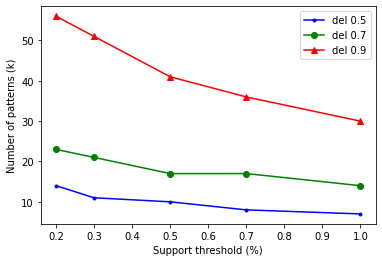

In [19]:
# For graph 1
gs = []
dels = [0.5, 0.7, 0.9]
pers = [[0.2, 0.3, 0.5, 0.7, 1] for _ in range(len(dels))]
counts = [[0, 0, 0, 0, 0] for _ in range(len(dels))]
for ds in dels:
    gs.append(get_supports(ds, 0.5))

# print(get_supports(0.9, 0.5))

for i in range(3):
    for j in range(5):
        percent = pers[i][j]/100
        for k in gs[i]:
            if k > percent:
                counts[i][j] += 1

plt_graphs(pers, counts, labels=["del 0.5", "del 0.7", "del 0.9"], colors=["b", "g", "r"], markers=['.', 'o', '^'], x_label="Support threshold (%)", y_label= "Number of patterns (k)")

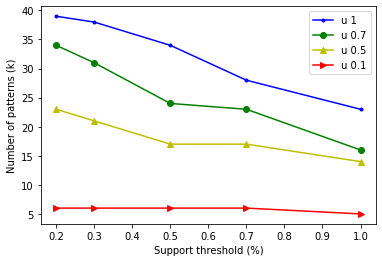

In [20]:
# For graph 2
gs = []
us = [1, 0.7, 0.5, 0.1]
pers = [[0.2, 0.3, 0.5, 0.7, 1] for _ in range(len(us))]
counts = [[0, 0, 0, 0, 0] for _ in range(len(us))]

for u in us:
    gs.append(get_supports(0.7, u))

for i in range(4):
    for j in range(5):
        percent = pers[i][j]/100
        for k in gs[i]:
            if k > percent:
                counts[i][j] += 1

plt_graphs(pers, counts, labels=["u 1", "u 0.7", "u 0.5", "u 0.1"], colors=["b", "g", "y", "r"], markers=['.', 'o', '^', ">"], x_label="Support threshold (%)", y_label= "Number of patterns (k)")

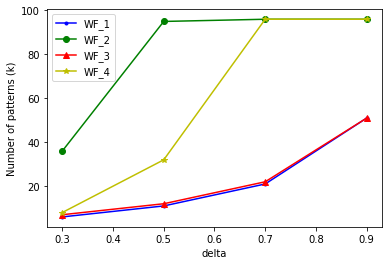

In [44]:
# For graph 3
gs = []
WF = [1, 2, 3, 4]
dels = [[0.3, 0.5, 0.7, 0.9] for _ in range(4)]
counts = [[0, 0, 0, 0] for _ in range(4)]
for wf in WF:
    for dl in dels[0]:
        gs.append(get_supports(dl, 0.5, wf))

for i in range(4):
    for j in range(4):
        for k in gs[4*i + j]:
            if k > 0.003:
                counts[i][j] += 1

plt_graphs(dels, counts, labels=["WF_1", "WF_2", "WF_3", "WF_4"], colors=["b", "g", "r", "y"], markers=['.', 'o', '^', '*'], x_label="delta", y_label= "Number of patterns (k)")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


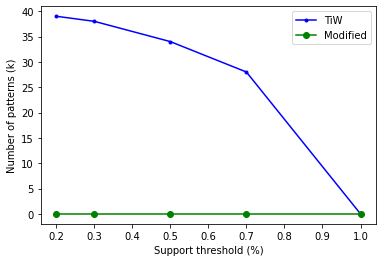

In [22]:
gs = []
pers = [[0.2, 0.3, 0.5, 0.7, 1] for _ in range(2)]
counts = [[0, 0, 0, 0, 0] for _ in range(2)]
gs.append(get_supports(0.7, 1))
gs.append(get_supports_modified(0.7, 1))

# print(get_supports(0.9, 0.5))

for i in range(2):
    for j in range(4):
        percent = pers[i][j]/100
        for k in gs[i]:
            if k > percent:
                counts[i][j] += 1

plt_graphs(pers, counts, labels=["TiW", "Modified"], colors=["b", "g"], markers=['.', 'o'], x_label="Support threshold (%)", y_label= "Number of patterns (k)")

In [62]:
# Graph 5 modified vs
def weighting_function_graphs(wf = 1):
    gs = []
    x1s = [0, 0.7, 1]
    pers = [[0.2, 0.3, 0.5, 0.7, 1] for _ in range(len(x1s))]
    counts = [[0, 0, 0, 0, 0] for _ in range(5)]
    for x1 in x1s:
        gs.append(get_support_modified_2(0.7, 0.5, wf, x1, 1-x1))

    # print(get_supports(0.9, 0.5))

    for i in range(len(x1s)):
        for j in range(5):
            percent = pers[i][j]/100
            for k in gs[i]:
                if k > percent:
                    counts[i][j] += 1

    plt_graphs(pers, counts, labels=["Nominal", "Modified", "TiW"], colors=["b", "g", "r"], markers=['.', 'o', '^'], x_label="Support threshold (%)", y_label= "Number of patterns (k)")

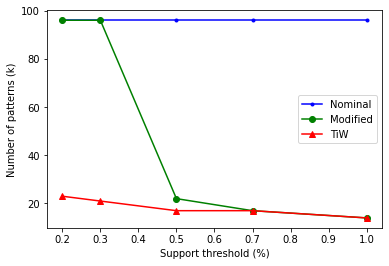

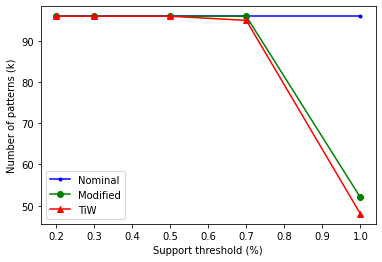

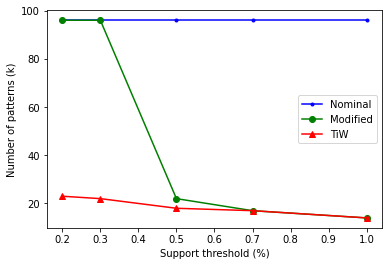

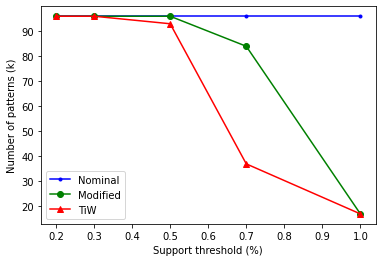

In [63]:
for i in range(1, 5):
  weighting_function_graphs(i)